In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
pwd

'/Users/A.IVA/Documents/jupyter_notebooks/coursera_and_blogs/pytorch/clouds'

In [0]:
import torch
from torch.utils.data import DataLoader, Subset

from clouds.dataset import CloudsDataset as CloudsDataset_v1
from clouds.dataset_v2 import CloudsDataset as CloudsDataset_v2

from clouds.torchvision_references.detection import utils
from clouds.torchvision_references.detection.transforms import get_transform as get_transform_v1
from clouds.torchvision_references.detection.transforms_v2 import get_transform as get_transform_v2
from clouds.torchvision_references.detection.comp_albumeraions import comp_aug

### 1 Datasets and Dataloaders

In [0]:
img_dir_train = "/content/drive/My Drive/data/source/clouds/train_images"
labels_path_train = "/content/drive/My Drive/data/source/clouds/train.csv"

size_tr_val = 20
size_val = 8
batch_size = 2
seed = 1

dataset_train_v1 = CloudsDataset_v1(img_dir_train, labels_path_train, get_transform_v1(True), size_tr_val)
dataset_test_v1 = CloudsDataset_v1(img_dir_train, labels_path_train, get_transform_v1(False), size_tr_val)

dataset_train_v2 = CloudsDataset_v2(img_dir_train, labels_path_train, get_transform_v2(True, comp_aug), size_tr_val)
dataset_test_v2 = CloudsDataset_v2(img_dir_train, labels_path_train, get_transform_v2(False, None), size_tr_val)

torch.manual_seed(seed)
indices = torch.randperm(len(dataset_train_v1)).tolist()

dataset_train_v1 = Subset(dataset_train_v1, indices[:-size_val])
dataset_test_v1 = Subset(dataset_test_v1, indices[-size_val:])

dataset_train_v2 = Subset(dataset_train_v2, indices[:-size_val])
dataset_test_v2 = Subset(dataset_test_v2, indices[-size_val:])

data_loader_train_v1 = DataLoader(dataset_train_v1,
                                  batch_size=batch_size,
                                  shuffle=False,
                                  num_workers=1,
                                  collate_fn=utils.collate_fn)

data_loader_test_v1 = DataLoader(dataset_test_v1,
                                 batch_size=batch_size,
                                 shuffle=False,
                                 num_workers=1,
                                 collate_fn=utils.collate_fn)

data_loader_train_v2 = DataLoader(dataset_train_v2,
                                  batch_size=batch_size,
                                  shuffle=False,
                                  num_workers=1,
                                  collate_fn=utils.collate_fn)

data_loader_test_v2 = DataLoader(dataset_test_v2,
                                 batch_size=batch_size,
                                 shuffle=False,
                                 num_workers=1,
                                 collate_fn=utils.collate_fn)

### 2 Compare both dataloaders

In [0]:
import itertools
import math
import matplotlib.pyplot as plt
from clouds.visualization import create_labled_image_from_dataloader_batch

##### 2.1 Train: albumerations vs random horizontal/vertical flips

In [0]:
dataiter_v1 = iter(data_loader_train_v1)
dataiter_v2 = iter(data_loader_train_v2)

all_images_v1, all_targets_v1 = [], []
all_images_v2, all_targets_v2 = [], []

for i in range(3):
    images_v1, targets_v1 = dataiter_v1.next()
    images_v2, targets_v2 = dataiter_v2.next()

    all_images_v1.append(images_v1)
    all_targets_v1.append(targets_v1)

    all_images_v2.append(images_v2)
    all_targets_v2.append(targets_v2)

all_images_v1 = list(itertools.chain(*all_images_v1))
all_targets_v1 = list(itertools.chain(*all_targets_v1))
all_images_v2 = list(itertools.chain(*all_images_v2))
all_targets_v2 = list(itertools.chain(*all_targets_v2))

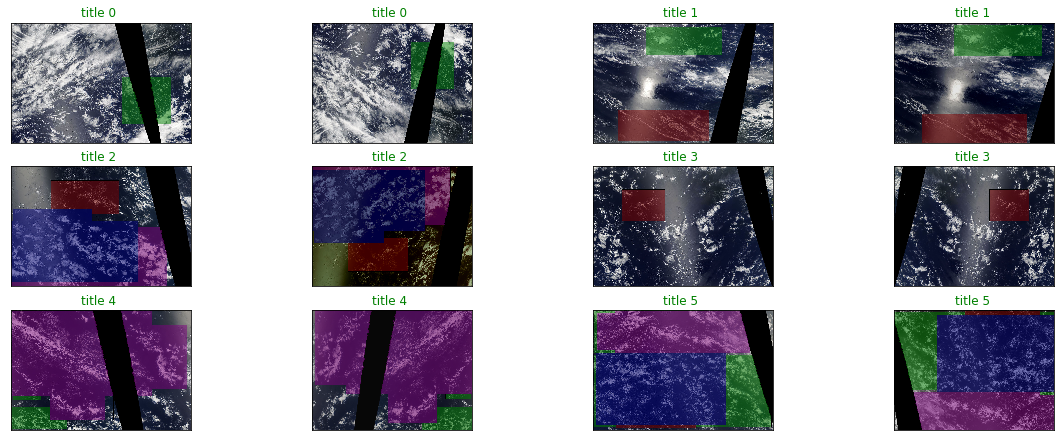

In [30]:
all_images_v1 = create_labled_image_from_dataloader_batch(all_images_v1, all_targets_v1)
all_images_v2 = create_labled_image_from_dataloader_batch(all_images_v2, all_targets_v2)

n = 2 * len(all_images_v1)
columns = 4
rows = math.ceil(n / float(columns))

fig = plt.figure(figsize=(20, 2.5 * rows)) # width, height

for idx, (image1, image2) in enumerate(zip(all_images_v1, all_images_v2), start=0):

    ax = fig.add_subplot(rows, columns, 2*idx+1, xticks=[], yticks=[])
    # size = ','.join([str(image1.size()[0]), str(image1.size()[1]), str(image1.size()[2])])
    plt.imshow(image1)
    ax.set_title("title {0:d} {1:s}".format(idx, ''), color="green")

    ax = fig.add_subplot(rows, columns, 2*idx+2, xticks=[], yticks=[])
    # size = ','.join([str(image2.size()[0]), str(image2.size()[1]), str(image2.size()[2])])
    plt.imshow(image2)
    ax.set_title("title {0:d} {1:s}".format(idx, ''), color="green")

plt.pause(0.001)
plt.show()

##### 2.2 Test: all transformations should be turned off

In [0]:
dataiter_v1 = iter(data_loader_test_v1)
dataiter_v2 = iter(data_loader_test_v2)

all_images_v1, all_targets_v1 = [], []
all_images_v2, all_targets_v2 = [], []

for i in range(3):
    images_v1, targets_v1 = dataiter_v1.next()
    images_v2, targets_v2 = dataiter_v2.next()

    all_images_v1.append(images_v1)
    all_targets_v1.append(targets_v1)

    all_images_v2.append(images_v2)
    all_targets_v2.append(targets_v2)

all_images_v1 = list(itertools.chain(*all_images_v1))
all_targets_v1 = list(itertools.chain(*all_targets_v1))
all_images_v2 = list(itertools.chain(*all_images_v2))
all_targets_v2 = list(itertools.chain(*all_targets_v2))

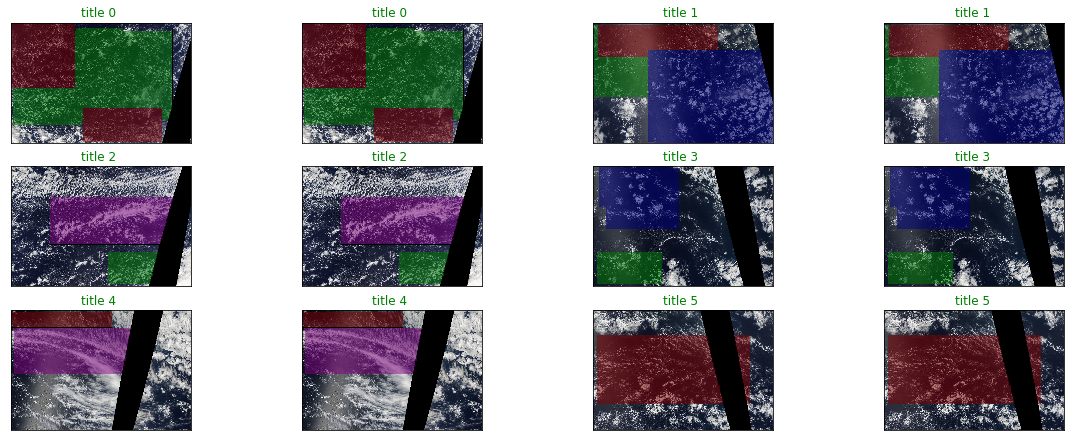

In [35]:
all_images_v1 = create_labled_image_from_dataloader_batch(all_images_v1, all_targets_v1)
all_images_v2 = create_labled_image_from_dataloader_batch(all_images_v2, all_targets_v2)

n = 2 * len(all_images_v1)
columns = 4
rows = math.ceil(n / float(columns))

fig = plt.figure(figsize=(20, 2.5 * rows)) # width, height

for idx, (image1, image2) in enumerate(zip(all_images_v1, all_images_v2), start=0):

    ax = fig.add_subplot(rows, columns, 2*idx+1, xticks=[], yticks=[])
    # size = ','.join([str(image1.size()[0]), str(image1.size()[1]), str(image1.size()[2])])
    plt.imshow(image1)
    ax.set_title("title {0:d} {1:s}".format(idx, ''), color="green")

    ax = fig.add_subplot(rows, columns, 2*idx+2, xticks=[], yticks=[])
    # size = ','.join([str(image2.size()[0]), str(image2.size()[1]), str(image2.size()[2])])
    plt.imshow(image2)
    ax.set_title("title {0:d} {1:s}".format(idx, ''), color="green")

plt.pause(0.001)
plt.show()